In [1]:
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
import BDACL
import sys
print(sys.version)
from BDACL import BDACLModel
from BDACL.utils import print_dataset_information
#### IMPORT LIBRARY ####
import scanpy as sc
import ED
import copy
ncluster=12
data_dir="E:/研究生记录/代码/BDACL/tutorial_data/Macaque_retina/macaque_raw.h5ad"
folder_path = 'E://研究生记录//结果//Macaque_retina'
os.chdir(folder_path)
adata_raw=sc.read(data_dir)
adata_raw


3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]


AnnData object with n_obs × n_vars = 30302 × 36162
    obs: 'batch', 'sample', 'macaque_id', 'nGene', 'nTranscripts', 'cluster', 'region', 'class', 'celltype', 'BATCH'

AnnData object with n_obs × n_vars = 30302 × 36162
    obs: 'batch', 'sample', 'macaque_id', 'nGene', 'nTranscripts', 'cluster', 'region', 'class', 'celltype', 'BATCH'
===========print brief infomation of dataset ===============
===========there are 4 batchs in this dataset==============
===========there are 12 celltypes with this dataset=========


celltype,BB/GB*,DB1,DB2,DB3a,DB3b,DB4,DB5*,DB6,FMB,IMB,OFFx,RB,Total
BATCH,,,,,,,,,,,,,
M1,564,578,726,225,778,862,911,312,2554,2208,69,1008,10795
M2,638,213,789,234,1370,1100,1425,143,890,1844,2,1573,10221
M3,286,144,438,146,390,378,439,92,1013,1014,8,233,4581
M4,327,61,291,18,102,645,692,111,43,1085,68,1262,4705
Total,1815,996,2244,623,2640,2985,3467,658,4500,6151,147,4076,30302


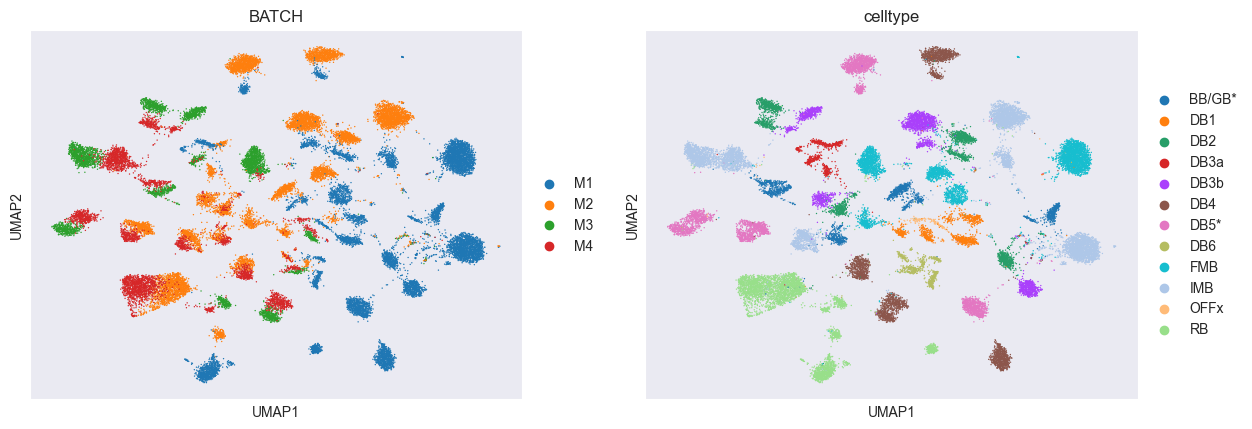

In [2]:
adata_raw.obs.rename(columns={"BATCH": "BATCH", "celltype": "celltype"}, inplace=True)
print(adata_raw)

print_dataset_information(adata_raw,batch_key="BATCH",celltype_key="celltype")
adata_copy = copy.deepcopy(adata_raw)
sc.pp.normalize_total(adata_copy,target_sum=1e4)
sc.pp.log1p(adata_copy)
sc.pp.highly_variable_genes(adata_copy,n_top_genes=3000,subset=True)
sc.pp.scale(adata_copy)
sc.tl.pca(adata_copy)
sc.pp.neighbors(adata_copy)
sc.tl.umap(adata_copy)
sc.pl.umap(adata_copy,color=["BATCH","celltype"])
adata_copy = copy.deepcopy(adata_raw)

In [3]:
adata__raw = ED.stage1.data_preprocess(adata_copy, 'BATCH')
adata__raw

Establishing Adata for Next Step...
PreProcess Done.


View of AnnData object with n_obs × n_vars = 30302 × 2000
    obs: 'batch', 'sample', 'macaque_id', 'nGene', 'nTranscripts', 'cluster', 'region', 'class', 'celltype', 'BATCH', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p'

In [4]:
EC, adata__raw = ED.stage1.BDACL_fast(adata__raw, key="BATCH",n_epochs=50)

Step 1: Calibrating Celltype...
[Epoch 1/50] [Reconstruction loss: 0.127428]
[Epoch 2/50] [Reconstruction loss: 0.111831]
[Epoch 3/50] [Reconstruction loss: 0.106126]
[Epoch 4/50] [Reconstruction loss: 0.100850]
[Epoch 5/50] [Reconstruction loss: 0.102422]
[Epoch 6/50] [Reconstruction loss: 0.097970]
[Epoch 7/50] [Reconstruction loss: 0.096586]
[Epoch 8/50] [Reconstruction loss: 0.094606]
[Epoch 9/50] [Reconstruction loss: 0.094793]
[Epoch 10/50] [Reconstruction loss: 0.092339]
[Epoch 11/50] [Reconstruction loss: 0.091996]
[Epoch 12/50] [Reconstruction loss: 0.091565]
[Epoch 13/50] [Reconstruction loss: 0.089063]
[Epoch 14/50] [Reconstruction loss: 0.089321]
[Epoch 15/50] [Reconstruction loss: 0.089353]
[Epoch 16/50] [Reconstruction loss: 0.087770]
[Epoch 17/50] [Reconstruction loss: 0.086793]
[Epoch 18/50] [Reconstruction loss: 0.089378]
[Epoch 19/50] [Reconstruction loss: 0.087482]
[Epoch 20/50] [Reconstruction loss: 0.084226]
[Epoch 21/50] [Reconstruction loss: 0.082654]
[Epoch 22/5

... storing 'BATCH' as categorical


[<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

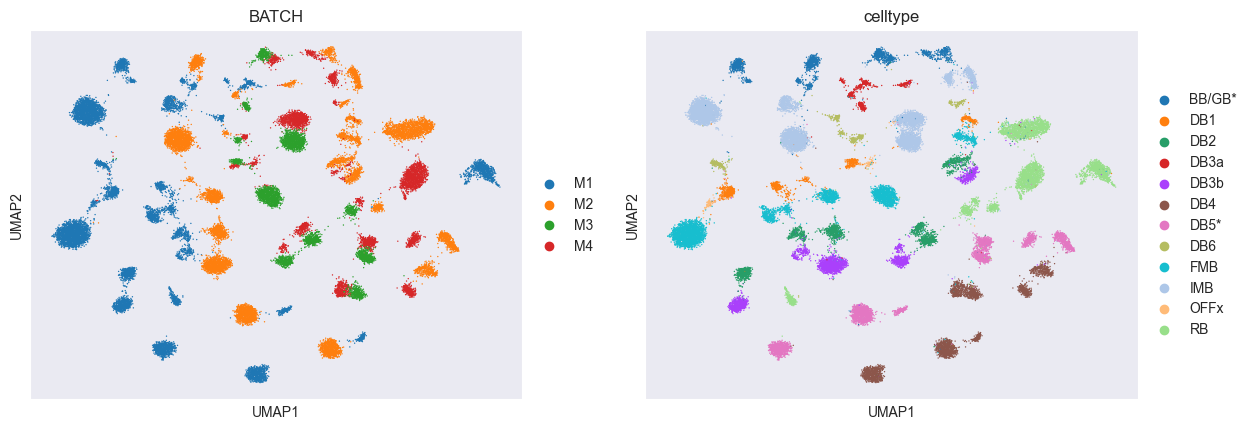

In [5]:
#View raw data,check the batch effect of this batch effect
adata_raw_copy=adata__raw.copy()
sc.pp.normalize_total(adata_raw_copy,target_sum=1e4)
sc.pp.log1p(adata_raw_copy)
sc.pp.highly_variable_genes(adata_raw_copy,n_top_genes=1000,subset=True)
sc.pp.scale(adata_raw_copy)
sc.tl.pca(adata_raw_copy)
sc.pp.neighbors(adata_raw_copy)
sc.tl.umap(adata_raw_copy)
sc.pl.umap(adata_raw_copy,color=["BATCH","celltype"],show=False)

In [6]:
dataset="newbact"
BDACL=BDACLModel(save_dir="./result/"+dataset+"/",verbose=True)

2024-06-18 13:42:30,337 - root - INFO - 创建日志文件...
2024-06-18 13:42:30,339 - root - INFO - 创建 Model 对象完成...


In [7]:
## fullrun
save_dir="./test_result/macaque_raw+/"
BDACL=BDACLModel(save_dir=save_dir)
adata=BDACL.preprocess(adata_raw,cluster_method="louvain",resolution=3.0)
from BDACL.utils import plotDendrogram, plotHeatMap


2024-06-18 13:42:33,595 - root - INFO - 创建日志文件...
2024-06-18 13:42:33,595 - root - INFO - 创建日志文件...
2024-06-18 13:42:33,599 - root - INFO - 创建 Model 对象完成...
2024-06-18 13:42:33,599 - root - INFO - 创建 Model 对象完成...
2024-06-18 13:42:33,605 - root - INFO - 正在执行 preprocess() 函数...
2024-06-18 13:42:33,605 - root - INFO - 正在执行 preprocess() 函数...
2024-06-18 13:42:33,609 - root - INFO - 模式=unsupervised
2024-06-18 13:42:33,609 - root - INFO - 模式=unsupervised
2024-06-18 13:42:33,612 - root - INFO - 聚类方法=louvain
2024-06-18 13:42:33,612 - root - INFO - 聚类方法=louvain
2024-06-18 13:42:33,615 - root - INFO - 分辨率=3.0
2024-06-18 13:42:33,615 - root - INFO - 分辨率=3.0
2024-06-18 13:42:33,618 - root - INFO - 批次键=BATCH
2024-06-18 13:42:33,618 - root - INFO - 批次键=BATCH
2024-06-18 13:42:33,620 - root - INFO - Normalize counts per cell(sum=10000.0)
2024-06-18 13:42:33,620 - root - INFO - Normalize counts per cell(sum=10000.0)
2024-06-18 13:42:34,016 - root - INFO - Log1p data
2024-06-18 13:42:34,016 - root - IN

         Falling back to preprocessing with `sc.pp.pca` and default params.


2024-06-18 13:42:51,973 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2024-06-18 13:42:51,973 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2024-06-18 13:42:51,977 - root - INFO - Number of Cluster =36
2024-06-18 13:42:51,977 - root - INFO - Number of Cluster =36
2024-06-18 13:42:51,981 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
2024-06-18 13:42:51,981 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
2024-06-18 13:42:51,986 - root - INFO - 预处理数据集完成。
2024-06-18 13:42:51,986 - root - INFO - 预处理数据集完成。


2024-06-18 13:43:07,108 - root - INFO - mode=unsupervised
2024-06-18 13:43:07,108 - root - INFO - mode=unsupervised
2024-06-18 13:43:07,247 - root - INFO - K_in=6, K_bw=12
2024-06-18 13:43:07,247 - root - INFO - K_in=6, K_bw=12
2024-06-18 13:43:07,250 - root - INFO - 开始计算 KNN 和 MNN 以获取簇之间的相似性。
2024-06-18 13:43:07,250 - root - INFO - 开始计算 KNN 和 MNN 以获取簇之间的相似性。
2024-06-18 13:43:07,255 - root - INFO - 使用近似方法计算每个批次内的 KNN 对...
2024-06-18 13:43:07,255 - root - INFO - 使用近似方法计算每个批次内的 KNN 对...
2024-06-18 13:43:07,280 - root - INFO - Calculate KNN pair intra batch...........
2024-06-18 13:43:07,280 - root - INFO - Calculate KNN pair intra batch...........
2024-06-18 13:43:07,283 - root - INFO - K=6
2024-06-18 13:43:07,283 - root - INFO - K=6
2024-06-18 13:43:07,287 - root - INFO - metric=cosine
2024-06-18 13:43:07,287 - root - INFO - metric=cosine
2024-06-18 13:43:07,289 - root - INFO - Processing datasets: (0, 0) = ('M1', 'M1')
2024-06-18 13:43:07,289 - root - INFO - Processing datasets: (0, 0)

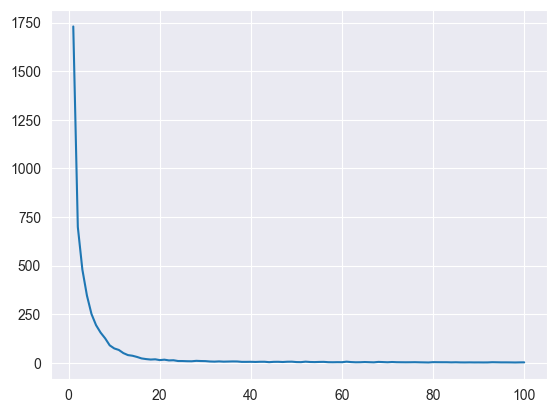

<Figure size 1500x1000 with 0 Axes>

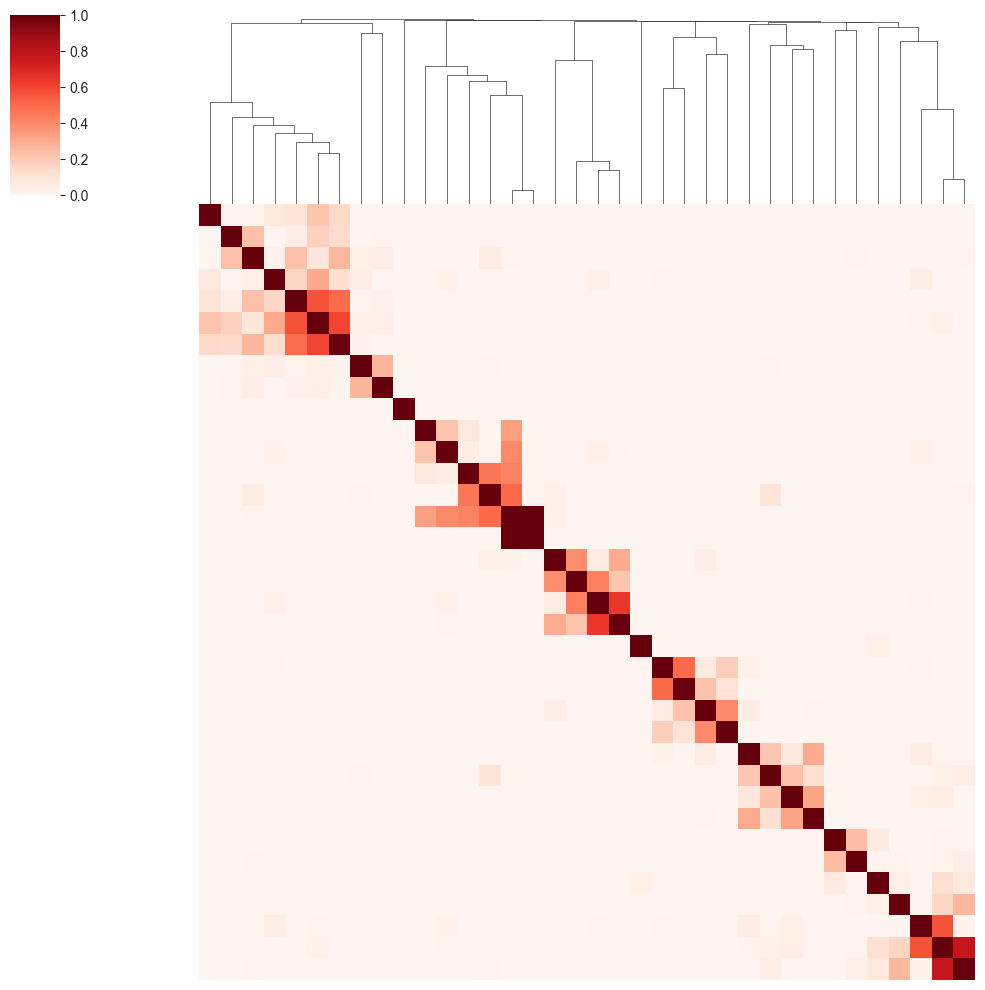

In [8]:
#print(adata)
BDACL.integrate(adata,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2")

plt.plot(range(1,len(BDACL.loss)+1),BDACL.loss)
fig = plt.figure(figsize=(15, 10))
Z = plotDendrogram(BDACL.cor_matrix.copy(), BDACL.nn_matrix.copy(),
                   BDACL.merge_df["init_cluster"].value_counts().values.copy())
hf = plotHeatMap(BDACL.cor_matrix.copy(), Z)

# Save the figure as SVG
plt.savefig('xiangsidu.svg', format='svg', bbox_inches='tight')
plt.show()

In [9]:
import pandas as pd
df=pd.crosstab(adata.obs["celltype"],adata.obs["reassign_cluster"])
col=df.apply('idxmax', axis=1).values
df=df[col]
df

reassign_cluster,10,11,7,2,0,9,6,1,8,4,3,5
celltype,,,,,,,,,,,,
BB/GB*,1726,1,2,1,0,2,2,1,5,70,0,5
DB1,1,976,1,1,1,0,0,1,6,0,8,1
DB2,3,0,2175,0,40,4,5,1,9,4,0,3
DB3a,1,0,2,616,0,0,0,0,1,0,1,2
DB3b,0,1,513,1,2100,3,5,0,5,4,1,7
DB4,0,0,2,0,2,2963,13,0,2,0,1,2
DB5*,1,0,2,0,0,4,3435,0,2,12,0,11
DB6,1,0,2,0,0,1,2,637,1,8,0,6
FMB,2,33,14,3,8,5,5,0,4388,9,24,9


... storing 'sample' as categorical
... storing 'macaque_id' as categorical
... storing 'region' as categorical


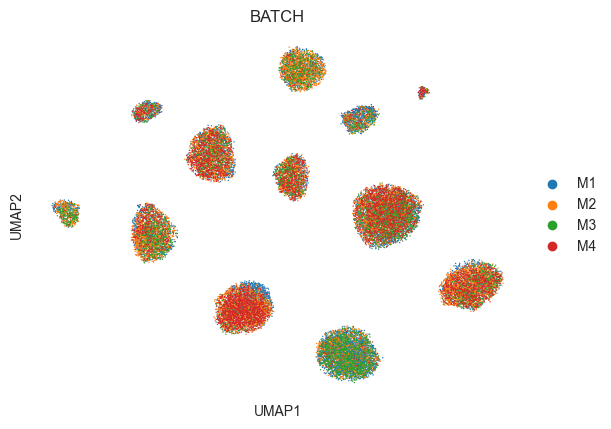

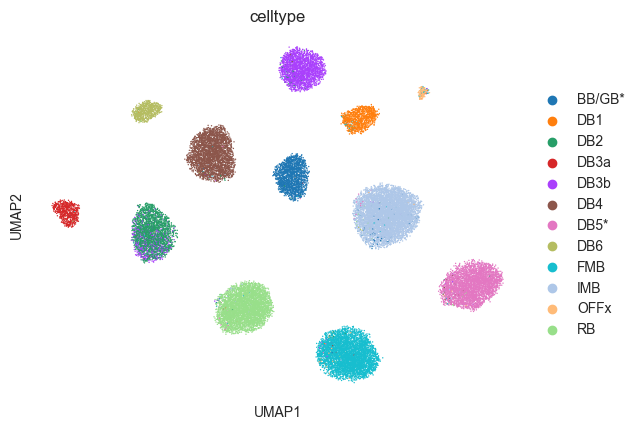

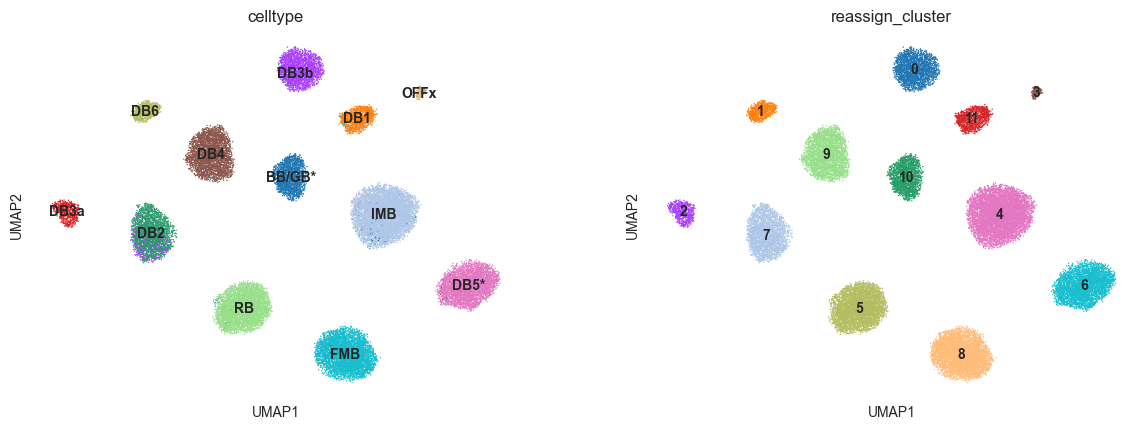

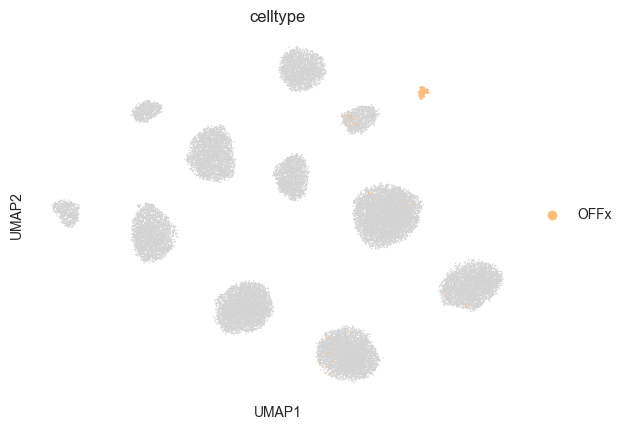

In [10]:
sc.pp.neighbors(adata, use_rep="X_emb", random_state=0)
sc.tl.umap(adata)
import os

folder_path = 'E:/研究生记录/结果/Macaque_retina'
os.chdir(folder_path)
# 创建图并保存
import matplotlib.pyplot as plt

# 设置背景颜色为白色
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# 创建图并保存
sc.pl.umap(adata, color=['BATCH'], save='BATCH.svg')
sc.pl.umap(adata, color=['celltype'], save='celltype.svg')
sc.pl.umap(adata, color=["celltype", "reassign_cluster"], legend_loc="on data", save='celltype_reassign_cluster.svg')
sc.pl.umap(adata,color=["celltype"],groups=["OFFx"],na_in_legend=False,save='OFFx.svg')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
nmi=normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))